
# Project: Investigate a Dataset (TMDb Movie Data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.











#### Questions :


1\ Which year has the highest release of movies?

2\ Movie with lowest and highest budget ?

3\ Movie with lowest and highest runtime?

4\ How does popularity of the movie affect at the profit of the movie ?


5\ The top genres of the movies ? 














In [9]:
# this cell to set up import statements for all of the packages 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [103]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='wrangling'></a>
## Data Cleaning (Removing the unused information from the dataset )



##### 1/ Check for all the null values dataset
##### 2/ use the function (fillna) to fill the null values
##### 3/ Count the total duplicates rows from the dataset 
##### 4/ Drop all the duplicates values 
##### 5/ Drope the unused colums that aren't needes in the analysis process









In [10]:
# Check for all the null values dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# use the function (fillna) to fill the null values
#that we count before
df.fillna(0,inplace = True)

In [12]:
# Count the total duplicates rows from the dataset 
df.duplicated().sum()

1

In [16]:
# Drop all the duplicates values 
df.drop_duplicates(inplace=True)

In [17]:
#Checking 
df.shape

(10865, 21)

In [18]:
#drope the unused colums
#that aren't needes in the analysis process
#Like 'imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'

df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis =1,inplace = True)

In [19]:
#Checking 
df.shape

(10865, 15)

In [20]:
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [21]:
# we should change the dataset into an datetime format 
#because it's given in a string format 

df['release_date']=pd.to_datetime(df['release_date'])

In [22]:
#to see the table :
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis








### Question 1 (Which year has the highest release of movies?)


first we should count in each year how many numbers of movies 


In [35]:
count=df.groupby('release_year').count()['id']

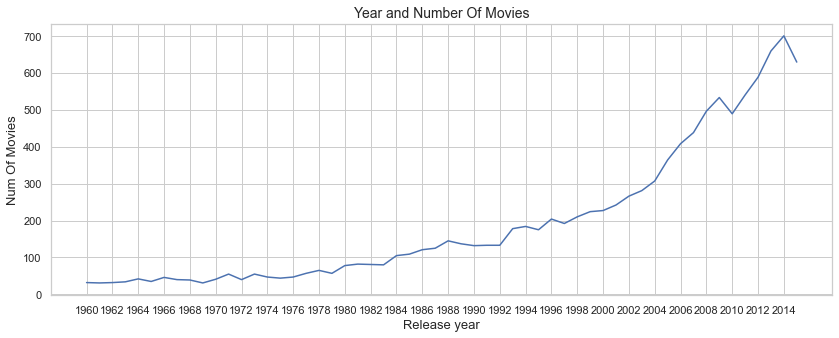

In [41]:
count.plot(xticks = np.arange(1960,2016,2))
sns.set(rc={'figure.figsize':(14,5)})
plt.title("Year and Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Num Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

from the plot we can see that the highest relese of movies is in year 2014 with 700 movies 

### Question 2 (Movie with Lowest And Highest Budget ?)

###### To find the index of lowest and highest budget and runtime we will use 'idmin' for the lowest index and 'idmax' for the highest index 

In [81]:
# we will search for the lowest and highest budget 

def search_minmax(x):
    
    lowest_index = df[x].idxmin()
    highest_index = df[x].idxmax()
    
    lowest = pd.DataFrame(df.loc[lowest_index, :])
    highest = pd.DataFrame(df.loc[highest_index, :])

    # i replace the zero budget into NAN so the affect the result
    
    df['budget'] = df['budget'].replace(0,np.NAN)

    print ("The movie with the lowest "+ x + " =",df['original_title'][lowest_index])
    print ("The movie with the highest "+ x + " =",df['original_title'][highest_index])
    return pd.concat([lowest,highest], axis = 1)

search_minmax('budget')

The movie with the lowest budget = Fear Clinic
The movie with the highest budget = The Warrior's Way


,1151,2244
id,287524,46528
popularity,0.177102,0.25054
budget,1,4.25e+08
revenue,0,11087569
original_title,Fear Clinic,The Warrior's Way
cast,Thomas Dekker|Robert Englund|Cleopatra Coleman...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Robert Hall,Sngmoo Lee
keywords,phobia|doctor|fear,assassin|small town|revenge|deception|super speed
runtime,95,100
genres,Horror,Adventure|Fantasy|Action|Western|Thriller


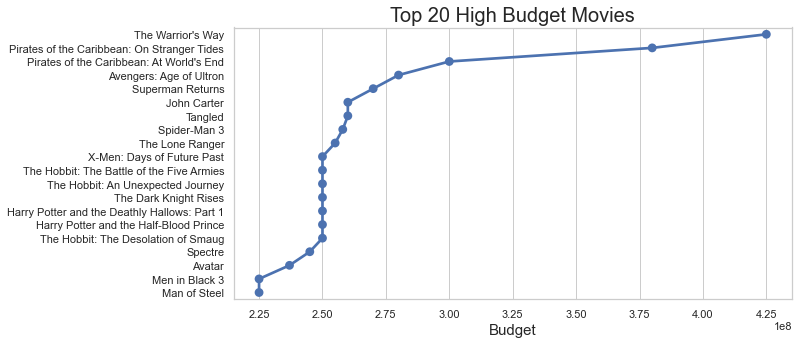

In [90]:
#make a plot with the highest budget movies.

info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

x = list(data[:20])
y = list(info['budget'][:20])

#setup the title and labels in the plot.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 20 High Budget Movies",fontsize = 20)
ax.set_xlabel("Budget",fontsize = 15)
sns.set_style("darkgrid")


###### as we can see 'The Warrior's Way' is the highest budget movie 

### Question 3 (Movie with Lowest And Highest  runtime ?)



In [82]:
# we will search for the lowest and highest runtime  
# i replace the zero budget into NAN so the affect the result


df['runtime'] = df['runtime'].replace(0,np.NAN)
search_minmax('runtime')

The movie with the lowest runtime = Fresh Guacamole
The movie with the highest runtime = The Story of Film: An Odyssey


,4883,3894
id,142563,125336
popularity,0.078472,0.006925
budget,NaN,NaN
revenue,0,0
original_title,Fresh Guacamole,The Story of Film: An Odyssey
cast,0,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director,PES,Mark Cousins
keywords,0,cinema|nouvelle vague|hindi cinema|cinema novo...
runtime,2,900
genres,Animation,Documentary


### Question 4 ( How does popularity of the movie affect at the profit of the movie ? )



##### first we should make the plot so we can see the relation the popularity and the profit

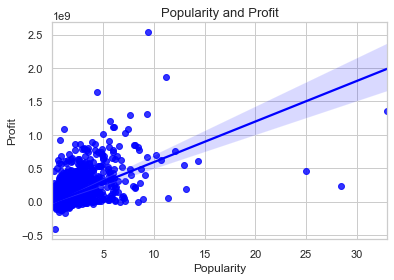

In [109]:
# i will do the profit of the equation [revenue - budget] because there no column of the profit 
df['Profit'] = df['revenue'] - df['budget']

pp = sns.regplot(x=df['popularity'],y=df['Profit'],color='Blue')

#setup the title and the labels of the scatter plot.
pp.set_title("Popularity and Profit",fontsize=13)
pp.set_xlabel("Popularity",fontsize=12)
pp.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")



#if we want to find the correlation between them as an equation and numbers 

#data_corr = df.corr()
#print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','Profit'])


we can see there is a positive relationship between popularity and profit.

### Question 5 ( The top genres of the movies ? )



In [110]:
# let's a take look of the table 
df.loc[:,['original_title', 'genres']].head()

,original_title,genres
0,Jurassic World,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller
2,Insurgent,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,Action|Crime|Thriller


In [134]:
# so we should first separate each genres in each movie into every individuals
#make a function will will split the string and return the count of each genre.


def extract_data(column_name):
    
    # From the column entered, eparate the string by '|'
    all_data = df[column_name].str.cat(sep = '|')
    
    # StorE the values separately as series
    all_data = pd.Series(all_data.split('|'))
    
    # Read the descending order, starts with highest number
    count = all_data.value_counts(ascending = False)
    
    return count






# Use the function 

genres_count = extract_data('genres')
genres_count = pd.DataFrame(data=genres_count)

top_genres = genres_count.head(20)
top_genres







,0
Drama,4761
Comedy,3793
Thriller,2908
Action,2385
Romance,1712
Horror,1637
Adventure,1471
Crime,1355
Family,1231
Science Fiction,1230


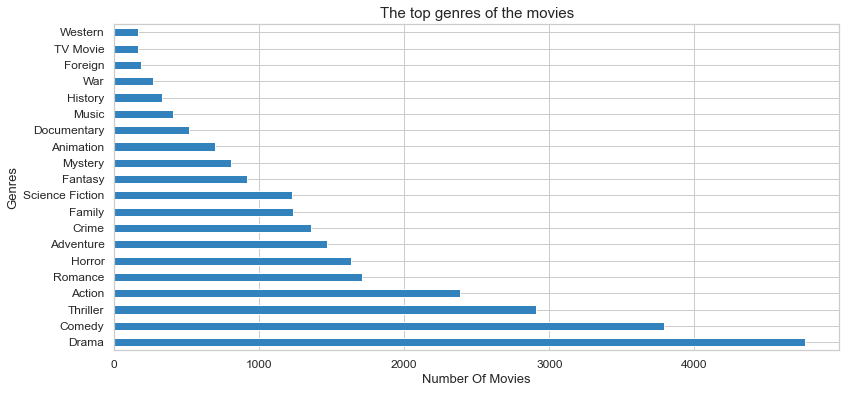

In [135]:
# i will use the same function that i make it before 



def extract_data(column_name):
    
    # From the column entered, eparate the string by '|'
    all_data = df[column_name].str.cat(sep = '|')
    
    # StorE the values separately as series
    all_data = pd.Series(all_data.split('|'))
    
    # Read the descending order, starts with highest number
    count = all_data.value_counts(ascending = False)
    
    return count



#call the function for counting the movies of each genre.
total_genre_movies = extract_data('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("The top genres of the movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

we can see the plot that Drama genre has the highest relese of movies with (4761) 

<a id='conclusions'></a>
## Conclusions


* year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629)

* the Movie Which Has Lowest budget is Fear Clinic and the Movie Which Has Highest budget is The Warrior's Way 

* The movie Which Has Highest runtime is The Story of Film: An Odyssey andThe movie Which Has Lowest runtime is Fresh Guacamole

* movies with high popularity tends to earn high profit.

* Drama is the most popular genre, following by action, comedy and thriller.








\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

Rania Alageel - Data analyst